In [15]:
import pandas as pd
import os
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from ast import literal_eval
import warnings
warnings.filterwarnings("ignore")

In [16]:
path_channel = r'channel_details.csv' # change if you ran it on your personal environment

In [17]:
channels = pd.read_csv(path_channel)

In [18]:
channels

,title,description,creat_date,video_counts,subscriber_counts,view_counts
0,SQUEEZIE,clique sur une vidéo nan??,2011-01-09T01:56:21Z,1456,17000000,9043483476
1,Cyprien,"Je fais des vidéos, en plus tu peux même les r...",2007-02-25T22:14:05Z,202,14300000,2966191265
2,NORMAN FAIT DES VIDÉOS,Je fais des vidéos YouTube depuis... toujours ...,2011-01-04T00:45:42Z,201,12000000,2662374516
3,OGGY,Welcome to the official Oggy Youtube channel!\...,2014-10-24T15:26:43Z,884,10700000,5456415811
4,GIMS,Chaîne YouTube Officielle de GIMS 🕶\n\nRetrouv...,2017-05-11T13:32:29Z,121,10500000,5696558126
...,...,...,...,...,...,...
92,Naps Officiel,Chaine officielle de Naps.\nOk Many Industrie ...,2014-06-20T15:30:35Z,102,3250000,2007875408
93,فرانس 24 / FRANCE 24 Arabic,فرانس24 قناة إعلامية دولية تبث برامجها على اله...,2007-04-04T09:02:29Z,110461,3240000,1051794337
94,Famille Musulmane,Videos produites par FamilleMusulmane.com,2009-09-14T12:59:47Z,30,3230000,1265933670
95,Wass Freestyle,Je suis Recordman du monde Guiness et 3X vice ...,2007-03-24T08:09:06Z,400,3190000,462636631


In [19]:
path_trending = r'all_videos_preprocess' # change if you ran it on your personal environment

In [20]:
# load trending details
all_videos = os.listdir(path_trending)
all_data = pd.DataFrame()

for video in all_videos :  
    channel = str("\\") + video
    data = pd.read_csv(path_trending+channel)
    all_data = all_data.append(data)

all_data['trending'] = (all_data['trending times']>0).apply(lambda x: int(x))

In [21]:
# add trending column
trending = all_data[all_data['trending']==1]
nb_trending = trending.groupby(['Channel Title'])['trending'].count().sort_values(ascending=False)
channels = channels.set_index('title').join(pd.DataFrame(nb_trending)).reset_index()

# add trending times column
trending = all_data[all_data['trending times']>0]
trending_times = trending.groupby(['Channel Title'])['trending times'].sum().sort_values(ascending=False)
channels = channels.set_index('title').join(pd.DataFrame(trending_times)).reset_index()

# add video analysed column
video_analysed = all_data.groupby(['Channel Title'])['Channel Title'].count().rename('video_analysed')
channels = channels.set_index('title').join(pd.DataFrame(video_analysed)).reset_index()

# add trending percentage column
channels['trending_percentage'] = channels.apply(lambda x: x['trending']/x['video_analysed'], axis=1)  

In [22]:
# sorting channels with more than 100 video analysed by trending percentage 
channels[channels['video_analysed']>100].sort_values(by=['trending_percentage'], ascending=False)

,title,description,creat_date,video_counts,subscriber_counts,view_counts,trending,trending times,video_analysed,trending_percentage
0,SQUEEZIE,clique sur une vidéo nan??,2011-01-09T01:56:21Z,1456,17000000,9043483476,124.0,696.0,164.0,0.756098
40,JOYCA,Jordan Aka JOYCA\nBeatmaker/Youtuber,2016-05-24T21:25:25Z,332,4800000,1016695889,105.0,555.0,139.0,0.755396
57,Mastu,Réalisant des vidéos essentiellement basées su...,2015-08-15T17:23:35Z,279,4060000,556187309,78.0,472.0,118.0,0.661017
11,Amixem,"Voyages, Expériences, Découvertes, Humour (des...",2012-11-09T15:29:18Z,653,7590000,2284437652,125.0,667.0,194.0,0.644330
54,Dr Nozman,Science & Expérience !\n\nContact : nozman.con...,2011-05-28T16:22:52Z,521,4170000,744790299,92.0,403.0,147.0,0.625850
63,Pierre Croce,Youtubeur fitness,2012-05-20T13:27:53Z,779,3860000,1286925619,78.0,438.0,149.0,0.523490
12,Michou,Je vous partage mes passions ! ❤️\n,2015-02-22T18:30:44Z,635,7430000,1722757577,116.0,699.0,223.0,0.520179
35,Inoxtag 2.0,"Hey ! bienvenue sur ma chaîne secondaire, tu t...",2020-01-11T17:14:30.901938Z,139,1800000,154413098,40.0,235.0,109.0,0.366972
46,FastGoodCuisine,"Olaaa ! Je suis Charles de FastGoodCuisine, la...",2012-08-28T17:45:30Z,1149,4510000,853493644,58.0,245.0,159.0,0.364780
52,SQUEEZIE GAMING,- Au moins deux best of chaque semaine\n- En l...,2018-09-10T15:26:08Z,467,4240000,1430102652,79.0,396.0,220.0,0.359091


## SQUEEZIE channel analysis

In [23]:
videos_sqeezie = all_data[all_data['Channel Title']=='SQUEEZIE'].sort_values(by=['Publish time']).reset_index(drop=True)

In [24]:
videos_sqeezie

,Title,Description,Channel Title,Publish time,Tags,Category,Duration,Number of comments,Number of likes,Number of views,Number of favorites,Video quality,Licensed,id,trending times,trending for,trending
0,19 MINUTES DE SUSPENS,Nour va-t-elle réussir à atteindre l'Allemagne...,SQUEEZIE,2017-11-14 17:53:33+00:00,"['squeezie jeu syrie', 'squeezie jeu immigrée'...",23,19:6,15596,367477,8010482,0,hd,1.0,Ka7F4wf7O28,0.0,0.0,0
1,JE SORS UN LIVRE !,Trop content d'enfin pouvoir vous présenter ce...,SQUEEZIE,2017-11-16 16:16:30+00:00,"['squeezie livre', 'squeezie tourne la page', ...",23,4:17,10537,230108,3465117,0,hd,1.0,h2l8hC6hdlA,0.0,0.0,0
2,SQUEEZIE - FREESTYLE DE L'AUTODÉRISION,"Aujourd'hui on parle de l'autodérision, une ch...",SQUEEZIE,2017-11-18 19:14:12+00:00,"['squeezie musique', 'squeezie chanson', 'sque...",23,2:25,47716,774359,20744873,0,hd,1.0,gN_L27itbTA,4.0,3 days 00:00:00,1
3,CETTE VIDÉO EST TRAGIQUE,Un challenge à la hauteur de notre skill est a...,SQUEEZIE,2017-11-22 17:32:46+00:00,"['squeezie jeu marteau', 'squeezie jeu chaudro...",23,8:3,13927,350013,8402465,0,hd,1.0,54c_2LID52s,0.0,0.0,0
4,QUAND J’ÉTAIS ADOLESCENT,J'ai eu une adolescence un peu particulière......,SQUEEZIE,2017-11-24 17:42:29+00:00,"['squeezie adolescent', 'squeezie anecdotes', ...",23,10:2,24006,668300,21471594,0,hd,1.0,JHDDkxLsYDw,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,ne réservez pas une chambre dans cet hôtel (Th...,Thread horreur IRL 2 ! Je rappelle le concept ...,SQUEEZIE,2022-04-14 16:00:20+00:00,[],24,47:53,11337,463772,7316018,0,hd,1.0,85Nhe9NGZL0,8.0,7 days 00:00:00,1
160,n'allez jamais seul dans une forêt...,'BLEAK' la BD inspirée des thread horreur est ...,SQUEEZIE,2022-04-23 17:15:05+00:00,[],24,19:23,8568,423748,5381583,0,hd,1.0,nfWitbsfDdo,6.0,5 days 00:00:00,1
161,On a fait le plus grand où est Charlie du mond...,Merci à NordVPN d'avoir soutenu ce projet ! Té...,SQUEEZIE,2022-04-27 16:50:40+00:00,"['squeezie où est charlie', 'squeezie concept'...",24,34:22,11865,621557,6876806,0,hd,1.0,LBraVzyYDKg,7.0,6 days 00:00:00,1
162,ok cette fois ils m'ont eu,'BLEAK' la BD inspirée des thread horreur est ...,SQUEEZIE,2022-05-04 15:23:58+00:00,[],24,11:8,6020,426035,4632592,0,hd,1.0,xUZnN_7Xzlk,6.0,5 days 00:00:00,1


<AxesSubplot:xlabel='Publish date', ylabel='Number of likes'>

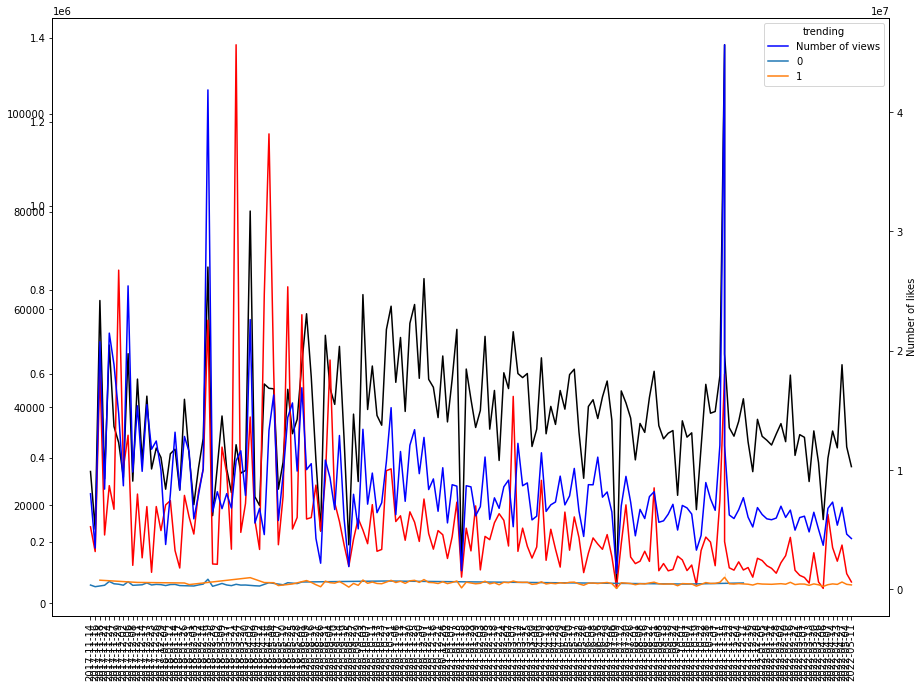

In [25]:
# Some channel details about numpber of likes, comments and views
videos_sqeezie['Publish date'] = videos_sqeezie['Publish time'].apply(lambda x : str(x).split(' ')[0])

lines = []
figur, ax1 = plt.subplots(figsize=(15,11))
plt.xticks(rotation=90)

#line[0] = ax2.plot(trending20_22.iloc[tag_sim_idx]['Publish date'],
#         trending20_22.iloc[tag_sim_idx]['Number of likes'].reset_index(drop=True), color='black', label='Number of likes')
line = ax1.plot(videos_sqeezie['Publish date'], videos_sqeezie['Number of likes'], color='black', label='Number of likes')
lines.append(line[0])
ax2 = ax1.twinx()
line = ax2.plot(videos_sqeezie['Publish date'], videos_sqeezie['Number of comments'], color='red', label='Number of comments')
lines.append(line[0])
ax3 = ax2.twinx()
line = ax3.plot(videos_sqeezie['Publish date'], videos_sqeezie['Number of views'], color='blue', label='Number of views')
lines.append(line[0])
plt.legend(iter(lines), ('Number of likes','Number of comments','Number of views'))
sns.lineplot(x='Publish date', y='Number of likes', hue='trending', data=videos_sqeezie)

In [26]:
# compare with data with the same categories (entertainement and Comedy)
all_data['Category'] = all_data['Category'].astype('int32')
all_data_c = all_data[(all_data['Category']==23)+ (all_data['Category']==24)]

In [27]:
all_data_c

,Title,Description,Channel Title,Publish time,Tags,Category,Duration,Number of comments,Number of likes,Number of views,Number of favorites,Video quality,Licensed,id,trending times,trending for,trending
0,UNE HISTOIRE ANGOISSANTE...,"Bleak, la BD inspirée des thread horreur, est ...",SQUEEZIE,2018-06-01 18:55:59+00:00,"['squeezie histoire', 'squeezie histoire qui f...",23,15:49,58927,623982,16895972,0,hd,1.0,3kPUyFEOMGM,0.0,0.0,0
1,J'AI RETROUVÉ MA CHAÎNE SECONDAIRE...,ABONNE-TOI ! http://bit.ly/2fm88Xo (merci)\nLa...,SQUEEZIE,2018-05-28 17:30:02+00:00,"['squeezie chaine secondaire', 'squeezie vieil...",23,14:50,17508,491511,9913470,0,hd,1.0,TurkUzz2uqI,0.0,0.0,0
2,QUI POSSÈDE LE MEILLEUR JOUET ? (ft Maxenss & ...,Quel candidat réussira à séduire le jury ?\nVo...,SQUEEZIE,2018-05-25 16:30:22+00:00,"['squeezie jouets', 'squeezie concours jouets'...",23,13:47,15137,457405,15623310,0,hd,1.0,0lAWLb1tv8s,4.0,3 days 00:00:00,1
3,CETTE NUIT VOUS NE DORMIREZ PAS,"Fake ou pas l'histoire est bien foutue, et c'e...",SQUEEZIE,2018-05-21 16:53:53+00:00,"['squeezie histoire', 'squeezie appartement ha...",23,10:16,64633,563033,14416248,0,hd,1.0,fZhIovdr8tM,0.0,0.0,0
4,LES STARS SONT-ELLES DES CLONES ?,ABONNE-TOI ! http://bit.ly/2fm88Xo (merci)\nLa...,SQUEEZIE,2018-05-10 16:59:51+00:00,"['squeezie théorie', 'squeezie vidéo théorie',...",23,10:55,21780,389438,9571111,0,hd,1.0,86mpIs7_DpQ,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31,QUAND TU ES EN CONFINEMENT ( encore ) - LES PA...,Episode 2 du confinement ! \nVoici quelques si...,Les Parodie Bros,2020-11-06 17:23:08+00:00,"['Les', 'Parodie', 'bros', 'les parodie bros',...",23,7:10,3400,77856,1849055,0,hd,1.0,xDhf77tboz0,6.0,5 days 00:00:00,1
32,QUAND TU MANGES EN FAMILLE - LES PARODIE BROS,Manger en famille ne se passe pas en général c...,Les Parodie Bros,2020-10-16 16:05:24+00:00,"['Les', 'Parodie', 'bros', 'les parodie bros',...",23,8:46,17841,137863,4785188,0,hd,1.0,ZfXlIHL_pzA,7.0,6 days 00:00:00,1
33,L'HOMME LE PLUS MECHANT (Chap 29) - Les Parodi...,Suite de l'épisode l'homme le plus méchant 3 \...,Les Parodie Bros,2020-10-02 16:05:07+00:00,"['Les', 'Parodie', 'bros', 'les parodie bros',...",23,8:33,4234,73927,2215041,0,hd,1.0,sr0OmdLsSLo,0.0,0.0,0
34,QUAND TU AS UN TÉLÉPHONE 3 - LES PARODIE BROS,"Troisième épisode de ""Quand tu as un téléphone...",Les Parodie Bros,2020-09-25 16:05:03+00:00,"['Les', 'Parodie', 'bros', 'les parodie bros',...",23,6:47,5899,101597,2960891,0,hd,1.0,8SQKg-ao3_w,6.0,5 days 00:00:00,1


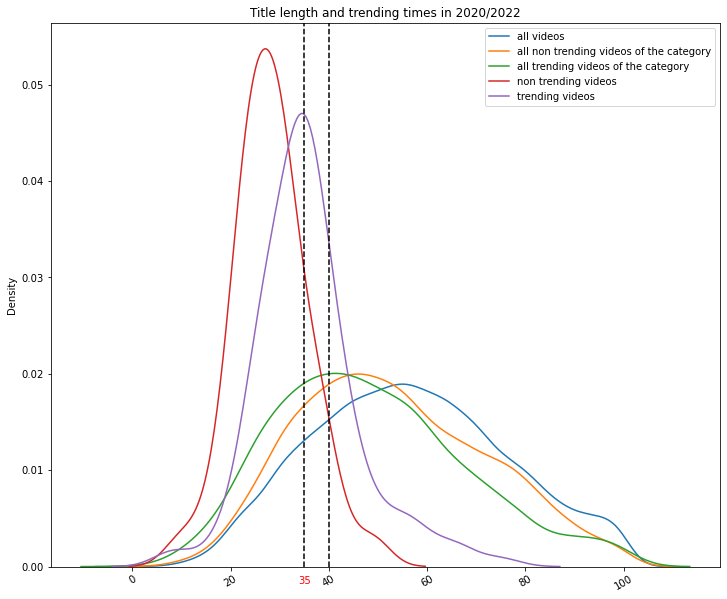

In [28]:
# title length 
figure = plt.figure(figsize=(12,10))
colors = sns.color_palette('pastel')[0:15]
plt.xticks(rotation=30)
plt.title('Title length and trending times in 2020/2022')

videos_sqeezie['title_length'] = videos_sqeezie['Title'].apply(lambda x : len(str(x)))
all_data['title_length'] = all_data['Title'].apply(lambda x : len(str(x)))
all_data_c['title_length'] = all_data_c['Title'].apply(lambda x : len(str(x)))

sns.distplot(x=all_data['title_length'], hist=False, label='all videos')
sns.distplot(x=all_data_c[all_data_c['trending']==0]['title_length'], hist=False, label='all non trending videos of the category')
sns.distplot(x=all_data_c[all_data_c['trending']==1]['title_length'], hist=False, label='all trending videos of the category')

sns.distplot(x=videos_sqeezie[videos_sqeezie['trending']==0]['title_length'], hist=False, label='non trending videos')
sns.distplot(x=videos_sqeezie[videos_sqeezie['trending']==1]['title_length'], hist=False, label='trending videos')
plt.axvline(x=40, color='black', linestyle='--')
plt.axvline(x=35, color='black', linestyle='--')
plt.text(35, -.001, '35', color='red', ha='center', va='top')

plt.legend()

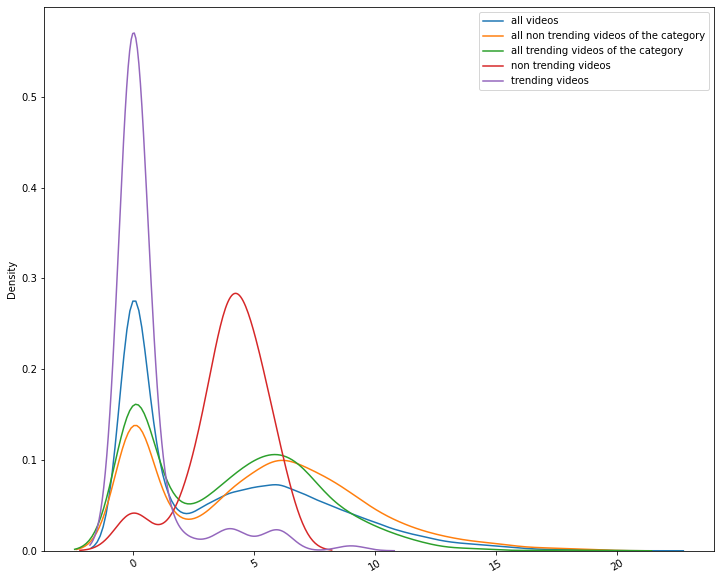

In [29]:
# number of uppercased words
title_words_all = all_data['Title'].apply(lambda x : str(x).split(' '))
title_words_c = all_data_c['Title'].apply(lambda x : str(x).split(' '))
title_words_squeezie = videos_sqeezie['Title'].apply(lambda x : str(x).split(' '))

figure = plt.figure(figsize=(12,10))
#colors = sns.color_palette('pastel')[0:15]
plt.xticks(rotation=30)
#plt.title('Barplot of the trending times in function of the number of uppercased words in the title')

all_data['nb_up_title'] = title_words_all.apply( lambda x : np.sum([j.isupper() for j in x]))
all_data_c['nb_up_title'] = title_words_c.apply( lambda x : np.sum([j.isupper() for j in x]))
videos_sqeezie['nb_up_title'] = title_words_squeezie.apply( lambda x : np.sum([j.isupper() for j in x]))

sns.distplot(x=all_data['nb_up_title'], hist=False, label='all videos')
sns.distplot(x=all_data_c[all_data_c['trending']==0]['nb_up_title'], hist=False, label='all non trending videos of the category')
sns.distplot(x=all_data_c[all_data_c['trending']==1]['nb_up_title'], hist=False, label='all trending videos of the category')

sns.distplot(x=videos_sqeezie[videos_sqeezie['trending']==0]['nb_up_title'], hist=False, label='non trending videos')
sns.distplot(x=videos_sqeezie[videos_sqeezie['trending']==1]['nb_up_title'], hist=False, label='trending videos')
plt.legend()

In [30]:
def format_time (x):
    if pd.isnull(x):
        return 0
    if (len(str(x).split(":"))==3):
        return (int(str(x).split(":")[0])*60+ int(str(x).split(":")[1]))
    elif (len(str(x).split(":"))==1):
        return(int(float(str(x).split(":")[0])*1/60))
    else :
        return (int(str(x).split(":")[0])+ int(str(x).split(":")[1])*1/60)

In [31]:
all_data['Duration_min'] = all_data['Duration'].apply(lambda x : format_time (x))
all_data_c['Duration_min'] = all_data_c['Duration'].apply(lambda x : format_time (x))
videos_sqeezie['Duration_min'] = videos_sqeezie['Duration'].apply(lambda x : format_time (x))

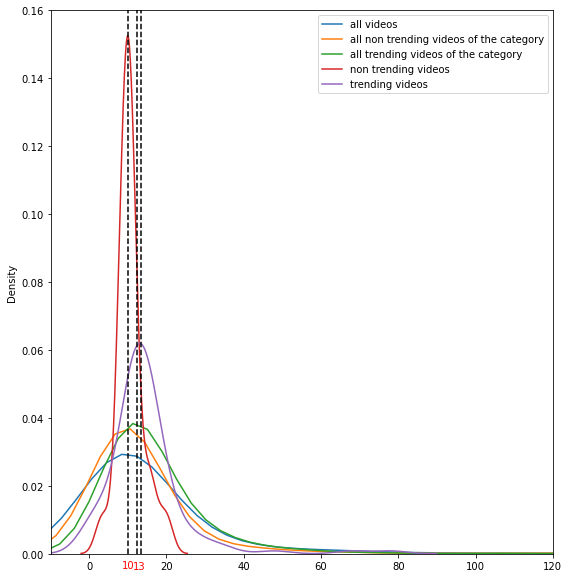

In [32]:
# youtube videos trending correlation with video length 
figure = plt.figure(figsize=(9,10))

sns.distplot(x=all_data['Duration_min'], hist=False, label='all videos')
sns.distplot(x=all_data_c[all_data_c['trending']==0]['Duration_min'], hist=False, label='all non trending videos of the category')
sns.distplot(x=all_data_c[all_data_c['trending']==1]['Duration_min'], hist=False, label='all trending videos of the category')

sns.distplot(x=videos_sqeezie[videos_sqeezie['trending']==0]['Duration_min'], hist=False, label='non trending videos')
sns.distplot(x=videos_sqeezie[videos_sqeezie['trending']==1]['Duration_min'], hist=False, label='trending videos')
plt.xlim([-10,120])
plt.axvline(x=13.5, color='black', linestyle='--')
plt.axvline(x=12.5, color='black', linestyle='--')
plt.axvline(x=10, color='black', linestyle='--')
plt.text(10, -.002, '10', color='red', ha='center', va='top')
plt.text(13, -.0021, '13', color='red', ha='center', va='top')

plt.legend()



In [33]:
# Hour of publish
all_data['hour of Publish'] = all_data['Publish time'].apply(lambda x : x.split(' ')[1].split(':')[0])
all_data_c['hour of Publish'] = all_data_c['Publish time'].apply(lambda x : x.split(' ')[1].split(':')[0])
videos_sqeezie['hour of Publish'] = videos_sqeezie['Publish time'].apply(lambda x : x.split(' ')[1].split(':')[0])

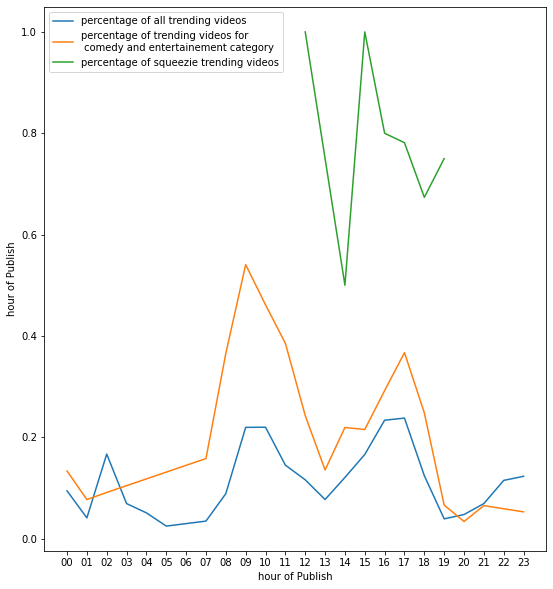

In [34]:
# youtube videos trending correlation with hour of publish
figure = plt.figure(figsize=(9,10))

trending = all_data[all_data['trending times']>0]
trending_c = all_data_c[all_data_c['trending times']>0]
trending_sqeezie = videos_sqeezie[videos_sqeezie['trending times']>0]

percentage = trending.groupby(by=['hour of Publish'])['hour of Publish'].count()/all_data.groupby(by=['hour of Publish'])['hour of Publish'].count()
percentage = percentage.sort_index()

percentage_c = trending_c.groupby(by=['hour of Publish'])['hour of Publish'].count()/all_data_c.groupby(by=['hour of Publish'])['hour of Publish'].count()
percentage_c = percentage_c.sort_index()

percentage_sqeezie = trending_sqeezie.groupby(by=['hour of Publish'])['hour of Publish'].count()/videos_sqeezie.groupby(by=['hour of Publish'])['hour of Publish'].count()
percentage_sqeezie = percentage_sqeezie.sort_index()

sns.lineplot(x=percentage.index, y=percentage, label='percentage of all trending videos')
sns.lineplot(x=percentage_c.index, y=percentage_c, label='percentage of trending videos for \n comedy and entertainement category')
sns.lineplot(x=percentage_sqeezie.index, y=percentage_sqeezie, label='percentage of squeezie trending videos')

plt.legend()



In [35]:
# description length
all_data['desc_length'] = all_data['Description'].apply(lambda x : len(str(x)))
all_data_c['desc_length'] = all_data_c['Description'].apply(lambda x : len(str(x)))
videos_sqeezie['desc_length'] = videos_sqeezie['Description'].apply(lambda x : len(str(x)))

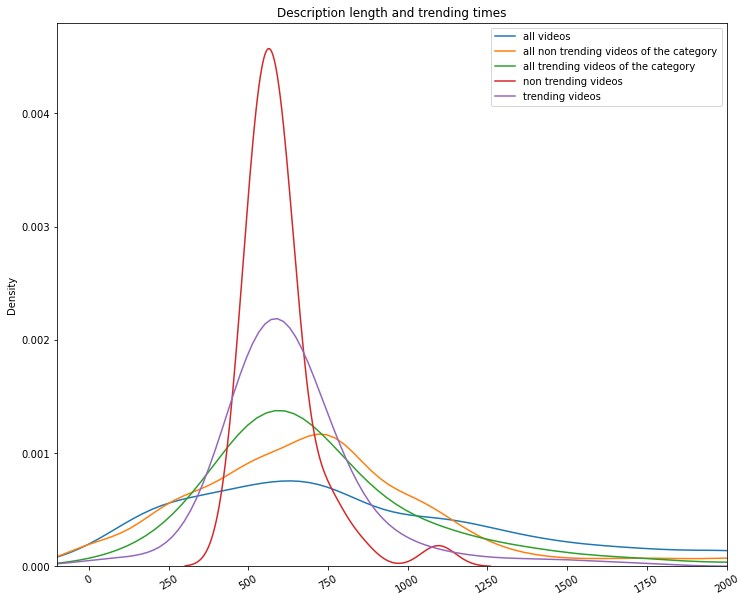

In [36]:
# description length and trending 
figure = plt.figure(figsize=(12,10))
colors = sns.color_palette('pastel')[0:15]
plt.xticks(rotation=30)
plt.title('Description length and trending times')

sns.distplot(x=all_data['desc_length'], hist=False, label='all videos')
sns.distplot(x=all_data_c[all_data_c['trending']==0]['desc_length'], hist=False, label='all non trending videos of the category')
sns.distplot(x=all_data_c[all_data_c['trending']==1]['desc_length'], hist=False, label='all trending videos of the category')

sns.distplot(x=videos_sqeezie[videos_sqeezie['trending']==0]['desc_length'], hist=False, label='non trending videos')
sns.distplot(x=videos_sqeezie[videos_sqeezie['trending']==1]['desc_length'], hist=False, label='trending videos')
plt.xlim([-100,2000])

#plt.axvline(x=40, color='black', linestyle='--')
#plt.axvline(x=35, color='black', linestyle='--')
#plt.text(35, -.001, '35', color='red', ha='center', va='top')

plt.legend()

In [37]:
all_data['tag_length'] = all_data['Tags'].apply(lambda x : len(str("". join(literal_eval(str(x))))))
all_data_c['tag_length'] = all_data_c['Tags'].apply(lambda x : len(str("". join(literal_eval(str(x))))))
videos_sqeezie['tag_length'] = videos_sqeezie['Tags'].apply(lambda x : len(str("". join(literal_eval(str(x))))))

In [38]:
all_data['tag_nb'] = all_data['Tags'].apply(lambda x : len(literal_eval(str(x))))
all_data_c['tag_nb'] = all_data_c['Tags'].apply(lambda x : len(literal_eval(str(x))))
videos_sqeezie['tag_nb'] = videos_sqeezie['Tags'].apply(lambda x : len(literal_eval(str(x))))

In [39]:
videos_sqeezie

,Title,Description,Channel Title,Publish time,Tags,Category,Duration,Number of comments,Number of likes,Number of views,...,trending for,trending,Publish date,title_length,nb_up_title,Duration_min,hour of Publish,desc_length,tag_length,tag_nb
0,19 MINUTES DE SUSPENS,Nour va-t-elle réussir à atteindre l'Allemagne...,SQUEEZIE,2017-11-14 17:53:33+00:00,"['squeezie jeu syrie', 'squeezie jeu immigrée'...",23,19:6,15596,367477,8010482,...,0.0,0,2017-11-14,21,3,19.100000,17,560,119,6
1,JE SORS UN LIVRE !,Trop content d'enfin pouvoir vous présenter ce...,SQUEEZIE,2017-11-16 16:16:30+00:00,"['squeezie livre', 'squeezie tourne la page', ...",23,4:17,10537,230108,3465117,...,0.0,0,2017-11-16,18,4,4.283333,16,647,100,6
2,SQUEEZIE - FREESTYLE DE L'AUTODÉRISION,"Aujourd'hui on parle de l'autodérision, une ch...",SQUEEZIE,2017-11-18 19:14:12+00:00,"['squeezie musique', 'squeezie chanson', 'sque...",23,2:25,47716,774359,20744873,...,3 days 00:00:00,1,2017-11-18,38,4,2.416667,19,823,106,6
3,CETTE VIDÉO EST TRAGIQUE,Un challenge à la hauteur de notre skill est a...,SQUEEZIE,2017-11-22 17:32:46+00:00,"['squeezie jeu marteau', 'squeezie jeu chaudro...",23,8:3,13927,350013,8402465,...,0.0,0,2017-11-22,24,4,8.050000,17,616,133,6
4,QUAND J’ÉTAIS ADOLESCENT,J'ai eu une adolescence un peu particulière......,SQUEEZIE,2017-11-24 17:42:29+00:00,"['squeezie adolescent', 'squeezie anecdotes', ...",23,10:2,24006,668300,21471594,...,0.0,0,2017-11-24,24,3,10.033333,17,513,126,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,ne réservez pas une chambre dans cet hôtel (Th...,Thread horreur IRL 2 ! Je rappelle le concept ...,SQUEEZIE,2022-04-14 16:00:20+00:00,[],24,47:53,11337,463772,7316018,...,7 days 00:00:00,1,2022-04-14,66,1,47.883333,16,928,0,0
160,n'allez jamais seul dans une forêt...,'BLEAK' la BD inspirée des thread horreur est ...,SQUEEZIE,2022-04-23 17:15:05+00:00,[],24,19:23,8568,423748,5381583,...,5 days 00:00:00,1,2022-04-23,37,0,19.383333,17,658,0,0
161,On a fait le plus grand où est Charlie du mond...,Merci à NordVPN d'avoir soutenu ce projet ! Té...,SQUEEZIE,2022-04-27 16:50:40+00:00,"['squeezie où est charlie', 'squeezie concept'...",24,34:22,11865,621557,6876806,...,6 days 00:00:00,1,2022-04-27,58,0,34.366667,16,691,80,4
162,ok cette fois ils m'ont eu,'BLEAK' la BD inspirée des thread horreur est ...,SQUEEZIE,2022-05-04 15:23:58+00:00,[],24,11:8,6020,426035,4632592,...,5 days 00:00:00,1,2022-05-04,26,0,11.133333,15,658,0,0


In [40]:
videos_sqeezie.rename(columns = {'Number of comments' : 'Number_of_comments', 'Number of likes': 'Number_of_likes',
                            'Number of views' : 'Number_of_views', 'hour of Publish' : 'hour_of_Publish', 'trending times' : 'trending_times'}, inplace=True) 

In [41]:
# regression model
import statsmodels.regression.linear_model as sm

estm = sm.OLS.from_formula('trending ~ Category + title_length+ nb_up_title + tag_length + tag_nb + desc_length + Duration_min + hour_of_Publish', videos_sqeezie).fit()

In [42]:
estm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               trending   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     25.51
Date:                Thu, 30 Jun 2022   Prob (F-statistic):           1.08e-32
Time:                        14:49:12   Log-Likelihood:                 6.1993
No. Observations:                 164   AIC:                             17.60
Df Residuals:                     149   BIC:                             64.10
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.3133      0.296      4.443      0.000       0.729       1.897
Category[T.23]           -0.4765      0.139     -3.440      0.001      -0.750      -0.203
Category[T.24]            0.2028      0.119      1.704      0.090      -0.032       0.438
hour_of_Publish[T.14]    -0.8917      0.304     -2.932      0.004      -1.493      -0.291
hour_of_Publish[T.15]    -0.6468      0.275     -2.349      0.020      -1.191      -0.103
hour_of_Publish[T.16]    -0.7652      0.252     -3.030      0.003      -1.264      -0.266
hour_of_Publish[T.17]    -0.8255      0.251     -3.289      0.001      -1.321      -0.330
hour_of_Publish[T.18]    -0.8717      0.251     -3.471      0.001      -1.368      -0.375
hour_of_Publish[T.19]    -0.7421      0.262     -2.829      0.005      -1.260      -0.224
title_length              0.0079      0.002      3.636      0.000       0.004       0.012
nb_up_title              -0.0251      0.018     -1.378      0.170      -0.061       0.011
tag_length             -2.23e-05      0.002     -0.012      0.990      -0.004       0.004
tag_nb                    0.0039      0.035      0.110      0.912      -0.066       0.073
desc_length               0.0001   7.72e-05      1.297      0.196   -5.24e-05       0.000
Duration_min             -0.0047      0.003     -1.734      0.085      -0.010       0.001
==============================================================================
Omnibus:                       31.600   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.557
Skew:                           0.223   Prob(JB):                     2.63e-57
Kurtosis:                       9.159   Cond. No.                     2.54e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.54e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""